# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [7]:
pip install keras

     |████████████████████████████████| 1.3 MB 662 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow

     |████████████████████████████████| 199.0 MB 40 kB/s  eta 0:00:01   |▌                               | 3.4 MB 133 kB/s eta 0:24:21     |██████▉                         | 42.2 MB 1.6 MB/s eta 0:01:40     |█████████▎                      | 57.6 MB 31 kB/s eta 1:13:47     |█████████▌                      | 59.4 MB 1.0 MB/s eta 0:02:17     |██████████                      | 61.5 MB 1.8 MB/s eta 0:01:18     |██████████▌                     | 65.1 MB 1.4 MB/s eta 0:01:39     |████████████▎                   | 76.3 MB 1.3 MB/s eta 0:01:37     |████████████▉                   | 79.7 MB 1.8 MB/s eta 0:01:09     |█████████████████▏              | 106.5 MB 1.2 MB/s eta 0:01:15     |███████████████████████▌        | 146.0 MB 72 kB/s eta 0:12:11     |███████████████████████▋        | 147.0 MB 72 kB/s eta 0:11:56     |██████████████████████████▋     | 165.4 MB 1.8 MB/s eta 0:00:19     |██████████████████████████████  | 186.6 MB 1.1 MB/s eta 0:00:11��████▍ | 189.0 MB 52 kB/s eta 0:03:10     |████

      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Librarías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras import preprocessing
from keras import backend as K
from livelossplot import PlotLossesKeras

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
# import scikitplot as skplt

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [15]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

# con 10 mín  fotos se generan 158 categorías
# con 40 mín  fotos se generan 19 categorías
# con 50 mín  fotos se generan 12 categorías

In [16]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (62, 47)


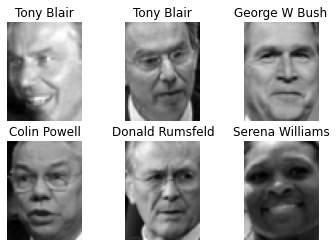

In [4]:
# Some examples
for i in range(6):
  img=X[i,:]
  img=img.reshape(W,H)
  plt.subplot(2,3,i+1)
  plt.title(target_name[y[i]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()

### MODELO 3 - LOGISTIC REGRESION

In [5]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Tuning parameters Logistic regresion:

* Paramter C as our regularization parameter. Parameter C = 1/λ.
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

* Penalty parameter refer to L1, L2 and Elastic-Net penalty. Ridge and Lasso regularizations are also known as ‘shrinkage’ methods, because they reduce or shrink the coefficients in the resulting regression. This reduces the variance in the model: as input variables are changed, the model’s prediction changes less than it would have without the regularization. Why would you want to reduce the variance of a model? To avoid overfit.


In [6]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [7]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.7220331754618302


In [10]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.56      0.64      0.60        14
    Arnold Schwarzenegger       0.71      0.42      0.53        12
             Colin Powell       0.85      0.88      0.87        52
          Donald Rumsfeld       0.79      0.73      0.76        30
            George W Bush       0.83      0.91      0.86       106
        Gerhard Schroeder       0.53      0.50      0.51        20
  Gloria Macapagal Arroyo       0.86      0.75      0.80         8
              Hugo Chavez       0.80      0.57      0.67        14
           Jacques Chirac       0.71      0.62      0.67         8
            Jean Chretien       0.70      0.64      0.67        11
        Jennifer Capriati       1.00      0.17      0.29         6
            John Ashcroft       0.71      0.50      0.59        10
        Junichiro Koizumi       0.91      0.83      0.87        12
               Laura Bush       0.88      0.78      0.82     

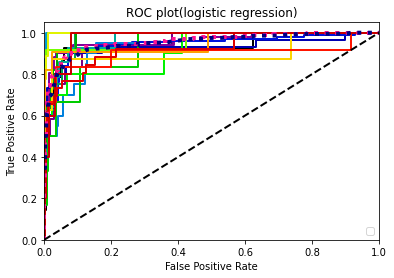

In [11]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

### BIBLIOGRAFÍA

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

https://github.com/harshitrai17152/Labeled-Faces-in-the-Wild.git
    